<img src="https://upload.wikimedia.org/wikipedia/commons/5/51/Seattle_Public_Library_logo.svg" style="float: center; margin: 100px; height: 150px">

# Seattle Public Library Checkouts Analysis

## Overview

### Problem Statement

The COVID-19 pandemic brought unprecedented global upheaval that’s still impacting our community today. The public library system has been a source of comfort and information during the pandemic, but that has not stemmed the -34% downturn in checkouts in 2020 and the projected -26% downturn in 2021 for the Seattle Public Library system. 

This analysis leverages the Library’s vast database of over fifteen years of checkout data to understand the changing trends in patron tastes and interests, and provide recommendations for how the Library can sow the seeds of resurgence as Seattle community emerges from the COVID-19 pandemic.

### The Dataset

This analysis uses the Seattle Public Library’s Checkouts by Title dataset, a monthly count of checkouts for both physical and digital items across the Library's 27 branches. It’s important to note that this dataset only registers the initial checkout of an item, and subsequent renewals are not represented.

The dataset has 37,546,146 entries upon analysis, representing initial checkouts from April 2005 to March 2021. The raw dataset is generally complete for essential data points, though there were over 25% null values for more detailed metadata like material creator, material publisher, and publish year.

<b><i>The information included in the original source of data is:</i></b>
* Usage Class: <i>Denotes if item is “physical” or “digital”</i>
* Checkout Type: <i>Denotes the vendor tool used to check out the item</i>
* Material Type: <i>Describes the type of item checked out </i>
* Checkout Year: <i>The 4-digit year of checkout for this record</i>
* Checkout Month: <i>The month of checkout for this record</i>
* Checkout Count: <i>A count of the number of times the title was checked out within the “Checkout Month”</i>
* Material Title: <i>The full title and subtitle of an individual item</i>
* Material Creator: <i>The author or entity responsible for authoring the item</i>
* Material Subjects: <i>The subject of the item as it appears in the catalog</i>
* Material Publisher: <i>The publisher of the title</i>
* Material Publication Year: <i>The year from the catalog record in which the item was published, printed, or copyrighted</i>

### Summary of Conclusions

- The Library saw its biggest years of growth leading up to 2009, fueled by a rise in checkouts of DVDs and CDs which bolstered a similarly growing number of book checkouts. The library hit a small slump in the early 2010s, with a pickup in the new decade thanks to a rise in e-book and audio book popularity. 


- The Library's total checkouts have steadily grown over the last fifteen-plus years prior to the pandemic, with 2016-2019's average yearly checkouts up nearly 5% vs. 2011-2015. The upheaval of 2020 brought a -34% decline to total checkouts, and while 2021 is projected to surpass 2020's checkouts by over 11%, there is still a -26% gap to make up before the system is back to "normal" checkout scale.


- The most popular months for checkouts are January, March, July, and August -- a trend that held strong until March 2020. Between New Year's resolutions and the summer holidays, the library can lean into already existing patron behavior and align events and promotion with the most popular months for checkouts.


- In 2019, digital materials made up 37% of the year's total checkouts. Digital material checkouts rose nearly 900K in 2020 (comprising 71% of the year's total checkouts), and are slated to continue their rise in 2021. While checkouts of physical materials is projected to be higher in 2021 than 2020, the projected EOY total of 2.2M for that usage class is still -62% below 2019. Prior to the COVID-19 pandemic, the yearly checkouts of physical books was the stalwart buoy for the Library's overall checkout scale.


- The Library has seen a meteoric rise in the popularity of literary materials, fueled by the increasingly wider adoption of digital and audio options. The strength of the Library's digital literary inventory was paramount to avoiding a sharper overall checkout decline during the pandemic. 


- The Library has seen a steady decline since 2009 in both Music & Sound and Video materials, which were previously important drivers of scale. Affordable streaming options that cater to all stripes of entertainment interests means that the Library will need to innovate in this space and think creatively about the utility it can provide for patrons in an increasingly-digital world. 


- Audiobooks saw a rise in popularity during the pandemic, but not to the same extent as E-Books. The audiobook and podcast space is another whitespace for the Library to explore as it emerges from the pandemic, especially as workers begin to commute again. It is essential that the Library's catalogue of audiobooks and how to access them be readily available for patrons of all ages.

### Future Improvements

With such a rich dataset to work with, there were many elements of the Library's information that was not included. One of the most obvious is an examination of trends in Material Title, which was not within the scope of this project. There are many interesting questions to pose when looking into specific trends by Title, including whether checkout data follows the best-seller lists and whether certain Titles are perennially popular (especially in light of the monthly checkout trends). 

On the operation side of the analysis, there is still much work to be done to create code that is -- as the Zen of Python notes -- simple, flat, and readable. Priority was placed on creating dynamic and informative visualizations, which means that there are plenty of instances where practicality of time trumped the general tenets of Python. 

In V2, the code base would be streamlined and functionalized in a way that would allow someone to input a new file on the 6th of each month when the dataset is updated and perform the full analysis below.

### Citations

The dataset for this analysis as well as the above Dataset descriptions are courtesy of the Seattle Public Library and the Seattle Open Data Program. To access the dataset and learn more, visit the __[Open Data Program website](https://data.seattle.gov/Community/Checkouts-by-Title/tmmm-ytt6)__.

# Part 1: Pre-Analysis Work and Dataset Preparation

## Import libraries

The libraries used for this analysis are Pandas and MatPlotLib.

In [2]:
# Pandas is used for data manipulation throughout the analysis. MatPlotLib is the primary data visualization tool.

import pandas as pd
import matplotlib.pyplot as plt

## Read in data and perform initial data inspection

The dataset for this analysis comes in the form of one CSV file. An initial read of the file finds that the data for Material Creator, Material Publisher, and Material Publish Date have null values for 25-33% of the entries. Ultimately this portion of the data is supplemental to the primary goal of this project and this amount of missing or potentially incorrect data will not limit the scope of this analysis.

In [3]:
# The dataset for this analysis is available to download via CSV file and is updated on the 6th of every month with the previous month's data.

spl_checkouts_raw = pd.read_csv('/Users/annamcgrady/Downloads/Checkouts_By_Title.csv')

In [4]:
# Inspection of null values in the raw dataset shows that the majority of values are filled for essential columns. Note that 0.23% of titles are explicitly labeled "<Unknown Title>".

spl_checkouts_raw.isnull().mean()

UsageClass         0.000000
CheckoutType       0.000000
MaterialType       0.000000
CheckoutYear       0.000000
CheckoutMonth      0.000000
Checkouts          0.000000
Title              0.000000
Creator            0.328562
Subjects           0.046417
Publisher          0.253048
PublicationYear    0.261604
dtype: float64

## Prepare dataset for analysis

In order to properly analyze this dataset, the column names are uniformly formatted and an additional column is created to provide the "friendly" name of each month and set as a Category, which will allow for greater ease in visualization down the road.

In [5]:
# The dataset has consistent column names upon download, but are updated to snake-case for this analysis. This is done before the dataset is broken into smaller parts to allow for complete consistency.

spl_checkouts_raw.rename(columns={
    'UsageClass': 'usage_class',
    'CheckoutType': 'checkout_type',
    'MaterialType': 'material_type',
    'CheckoutYear': 'checkout_year',
    'CheckoutMonth': 'checkout_month_num',
    'Checkouts': 'checkout_count',
    'Title': 'material_title',
    'Creator': 'material_creator',
    'Subjects': 'material_subjects',
    'Publisher': 'material_publisher',
    'PublicationYear': 'material_pub_year'
}, inplace=True)

In [6]:
# The dataset's month column is numerical, so a "friendly" month column is created and categorized for future visualization.

spl_checkouts_raw['checkout_month_friendly'] = spl_checkouts_raw['checkout_month_num'].map({
    1: 'January', 
    2: 'February', 
    3: 'March', 
    4: 'April', 
    5: 'May', 
    6: 'June', 
    7: 'July', 
    8: 'August', 
    9: 'September', 
    10: 'October', 
    11: 'November', 
    12: 'December'})

spl_checkouts_raw['checkout_month_friendly'] = pd.Categorical(spl_checkouts_raw['checkout_month_friendly'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

## Split the dataset into manageable subsets

The dataset upon read in is over 3GB in size, making it unweildly to perform extensive analysis as-is. To allow for a more streamlined approad to this analysis, the original dataset is divided into additional sets by timeframe, representing all of the full years in the dataset, the years impacted by COVID-19, and the years not impacted by COVID-19.

In [8]:
# Additional dataframes used in the analysis, which allow for easier manipulation around the pandemic impact.

spl_checkouts_full_years = spl_checkouts_raw[spl_checkouts_raw['checkout_year'].isin(['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'])]
spl_checkouts_full_years_no_covid = spl_checkouts_raw[spl_checkouts_raw['checkout_year'].isin(['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'])]
spl_checkouts_full_years_2021 = spl_checkouts_raw[spl_checkouts_raw['checkout_year'].isin(['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])]
spl_checkouts_covid_years = spl_checkouts_raw[spl_checkouts_raw['checkout_year'].isin(['2020', '2021'])]

# Part 2: Analysis and Exploration

## Explore checkouts by year

One of the first steps in performing the actual analysis of the SPL's dataset was to understand the changing patron trends by year. The data was first grouped by year, and aggregated by total checkouts. In general, the data for 2005 was not considered in this analysis, as it was for a partial year and there was ample information available from 2006 onward to understand early patron trends. For 2021, there was three months of checkout data available upon read in, so a projection was performed on the currently monthly average to allow for an approximate understanding of how the current year will end.

When visualized, the data shows that the public library system had its biggest years of growth in total checkouts leading up to 2009. Trends in material types are explored in more detail below, but this was fueled by a rise in checkouts of DVDs and CDs which bolstered a similarly growing number of book checkouts. The library hit a small slump in the early 2010s, with a pickup in the new decade thanks to a rise in e-book and audio book popularity. 

This visualization also shows a stark picture of the impact that the COVID-19 pandemic had on overall library checkouts, though we can see with the 2021 projection that there is a glimmer of hope in rising back up to the levels we were seeing before March 2020.

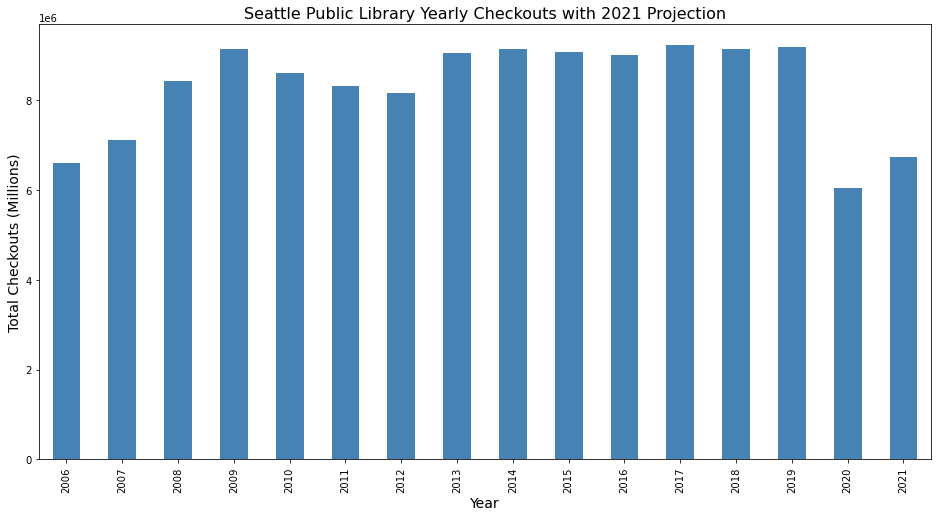

In [29]:
# A groupby is performed on checkout year and checkout count, to create the basis for a yearly visualization. A projected value for 2021 is also created, and replaces the new dataframe's current 2021 value (which represents data through March). 

checkouts_by_year = spl_checkouts_full_years_2021.groupby('checkout_year')['checkout_count'].sum().reset_index()
projection_2021 = int((checkouts_by_year[checkouts_by_year['checkout_year'] == 2021]['checkout_count'] / 3) * 12)

checkouts_by_year_final_df = checkouts_by_year.replace([checkouts_by_year[checkouts_by_year['checkout_year'] == 2021]['checkout_count']], projection_2021)

checkouts_by_year_final_df.plot(x= 'checkout_year', kind='bar', figsize=(16, 8), color = 'steelblue', legend = False)
plt.xlabel('Year', size = 14)
plt.ylabel('Total Checkouts (Millions)', size = 14)
plt.title('Seattle Public Library Yearly Checkouts with 2021 Projection', size=16);

## Explore average yearly performance

Because the years leading up to the pandemic were relatively flat compared to the more tumultuous decade prior, it was important to visualize a more generalized trend of patron checkouts, which will also provide for useful benchmarks as Seattle begins to emerge from the pandemic.

Averaging yearly performance in groups of 4-5 years, shows a clear picture of the general state of health that the library system was in before the pandemic, as well as the promising projected growth in 2021. The library system's total checkouts have steadily grown over the last fifteen-plus years, with 2016-2019's average yearly checkouts up nearly 5% vs. 2011-2015. 

The upheaval of 2020 brought a -34% decline to total checkouts, and while 2021 is projected to surpass 2020's checkouts by over 11%, there is still a -26% gap to make up before the system is back to "normal" checkout scale.

In [145]:
# The years of the data set are grouped in sets of 4-5 years and mask variables are created for the average performance and change over time percentages to allow for simple print statements.

yearly_checkouts_2006_2010 = int(checkouts_by_year_final_df[checkouts_by_year_final_df['checkout_year'].isin([2006, 2007, 2008, 2009, 2010])]['checkout_count'].mean())
yearly_checkouts_2011_2015 = int(checkouts_by_year_final_df[checkouts_by_year_final_df['checkout_year'].isin([2011, 2012, 2013, 2014, 2015])]['checkout_count'].mean())
yearly_checkouts_2016_2019 = int(checkouts_by_year_final_df[checkouts_by_year_final_df['checkout_year'].isin([2016, 2017, 2018, 2019])]['checkout_count'].mean())
yearly_checkouts_2020 = int(checkouts_by_year_final_df[checkouts_by_year_final_df['checkout_year'] == 2020]['checkout_count'].mean())
change_over_time_1 = (yearly_checkouts_2011_2015 - yearly_checkouts_2006_2010) / yearly_checkouts_2006_2010
change_over_time_2 = (yearly_checkouts_2016_2019 - yearly_checkouts_2011_2015) / yearly_checkouts_2011_2015
change_over_time_3 = (yearly_checkouts_2020 - yearly_checkouts_2016_2019) / yearly_checkouts_2016_2019
change_over_time_4 = (projection_2021 - yearly_checkouts_2020) / yearly_checkouts_2020
change_over_time_5 = (projection_2021 - yearly_checkouts_2016_2019) / yearly_checkouts_2016_2019

print(f"The average yearly checkouts for 2006-2010 was {yearly_checkouts_2006_2010} materials.\n")
print(f"The average yearly checkouts for 2011-2015 was {yearly_checkouts_2011_2015} materials.")
print("The change in average yearly checkouts from 2006-2010 to 2011-2015 was %.2f%%\n" % (100 * change_over_time_1))
print(f"The average yearly checkouts for 2016-2019 was {yearly_checkouts_2016_2019} materials.")
print("The change in average yearly checkouts from 2011-2015 to 2016-2019 was %.2f%%\n" % (100 * change_over_time_2))
print(f"The total checkouts for 2020 was {yearly_checkouts_2020} materials.")
print("The change in average yearly checkouts from 2016-2019 to 2020 was %.2f%%\n" % (100 * change_over_time_3))
print(f"The projected total checkouts for 2021 is {projection_2021} materials.")
print("The projected change in total checkouts from 2020 to 2021 is %.2f%%" % (100 * change_over_time_4))
print("The projected change in 2021 yearly checkouts vs. the 2016-2019 average is %.2f%%" % (100 * change_over_time_5))

The average yearly checkouts for 2006-2010 was 7981712 materials.

The average yearly checkouts for 2011-2015 was 8752426 materials.
The change in average yearly checkouts from 2006-2010 to 2011-2015 was 9.66%

The average yearly checkouts for 2016-2019 was 9150239 materials.
The change in average yearly checkouts from 2011-2015 to 2016-2019 was 4.55%

The total checkouts for 2020 was 6053717 materials.
The change in average yearly checkouts from 2016-2019 to 2020 was -33.84%

The projected total checkouts for 2021 is 6736772 materials.
The projected change in total checkouts from 2020 to 2021 is 11.28%
The projected change in 2021 yearly checkouts vs. the 2016-2019 average is -26.38%


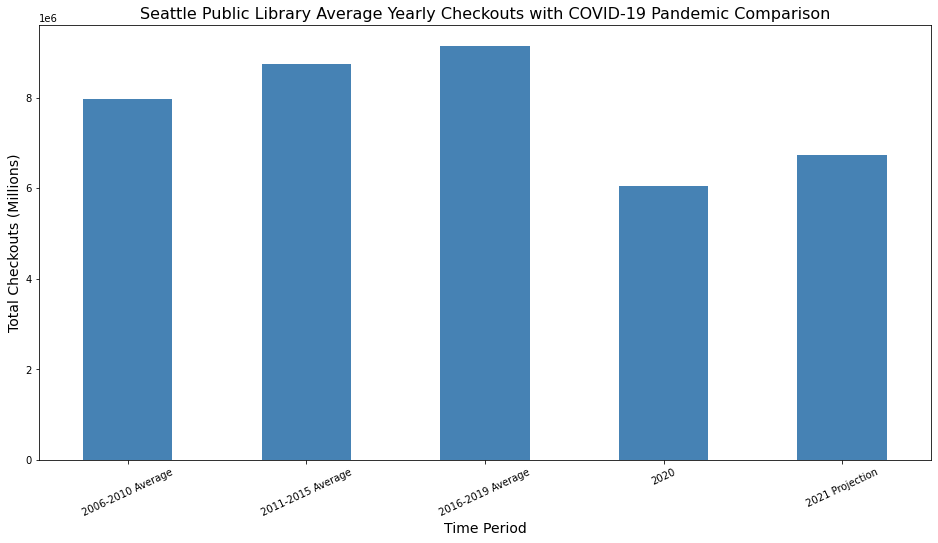

In [42]:
# A new dataframe is created with the data for the yearly buckets and visualized.

avg_yearly_checkouts_data_set = {'time_frame': ['2006-2010 Average', '2011-2015 Average', '2016-2019 Average', '2020', '2021 Projection'], 'avg_yearly_checkouts': [yearly_checkouts_2006_2010, yearly_checkouts_2011_2015, yearly_checkouts_2016_2019, yearly_checkouts_2020, projection_2021]}
avg_yearly_checkouts_dataframe = pd.DataFrame(data = avg_yearly_checkouts_data_set)

avg_yearly_checkouts_dataframe.plot(x= 'time_frame', kind='bar', figsize=(16, 8), color = 'steelblue', legend = False)
plt.xticks(rotation = 25)
plt.xlabel('Time Period', size = 14)
plt.ylabel('Total Checkouts (Millions)', size = 14)
plt.title('Seattle Public Library Average Yearly Checkouts with COVID-19 Pandemic Comparison', size=16);

## Explore trends in checkouts by month

An analysis of monthly trends in total checkouts from 2006-2021 adds additional context in understanding the stability of patron behavior over time. New dataframes of total checkouts by month are created for each year in the dataset, and these dataframes are then merged together to form a full-scale view of monthly changes in checkouts. Monthly performance is then averaged in buckets by year, creating a more usable dataframe of information by average for 2006-2010, 2011-2015, and 2016-2019. The pandemic years of 2020 and a partial 2021 are kept separate. 

A visualization of this data shows that patron behavior has remained consist since 2006, with growth across the board for each additional five years of data before the pandemic. The most popular months for checkouts are January, March, and then July/August, a trend that held strong until March 2020. Between New Year's resolutions and the summer holidays, the library can lean into patron behavior and align events and promotion with the most popular months for checkouts.

In [47]:
# Monthly performance by total checkouts is broken out into their own dataframes and merged. This merged dataframe is then manipulated to create bucketed for average performance. This portion of Python code is a clear candidate for functionalizing in the future.

monthly_2006 = spl_checkouts_full_years_2021[spl_checkouts_full_years_2021['checkout_year'] == 2006].groupby('checkout_month_friendly')['checkout_count'].sum().sort_values(ascending = False).reset_index()
monthly_2007 = spl_checkouts_full_years_2021[spl_checkouts_full_years_2021['checkout_year'] == 2007].groupby('checkout_month_friendly')['checkout_count'].sum().sort_values(ascending = False).reset_index()
monthly_2008 = spl_checkouts_full_years_2021[spl_checkouts_full_years_2021['checkout_year'] == 2008].groupby('checkout_month_friendly')['checkout_count'].sum().sort_values(ascending = False).reset_index()
monthly_2009 = spl_checkouts_full_years_2021[spl_checkouts_full_years_2021['checkout_year'] == 2009].groupby('checkout_month_friendly')['checkout_count'].sum().sort_values(ascending = False).reset_index()
monthly_2010 = spl_checkouts_full_years_2021[spl_checkouts_full_years_2021['checkout_year'] == 2010].groupby('checkout_month_friendly')['checkout_count'].sum().sort_values(ascending = False).reset_index()
monthly_2011 = spl_checkouts_full_years_2021[spl_checkouts_full_years_2021['checkout_year'] == 2011].groupby('checkout_month_friendly')['checkout_count'].sum().sort_values(ascending = False).reset_index()
monthly_2012 = spl_checkouts_full_years_2021[spl_checkouts_full_years_2021['checkout_year'] == 2012].groupby('checkout_month_friendly')['checkout_count'].sum().sort_values(ascending = False).reset_index()
monthly_2013 = spl_checkouts_full_years_2021[spl_checkouts_full_years_2021['checkout_year'] == 2013].groupby('checkout_month_friendly')['checkout_count'].sum().sort_values(ascending = False).reset_index()
monthly_2014 = spl_checkouts_full_years_2021[spl_checkouts_full_years_2021['checkout_year'] == 2014].groupby('checkout_month_friendly')['checkout_count'].sum().sort_values(ascending = False).reset_index()
monthly_2015 = spl_checkouts_full_years_2021[spl_checkouts_full_years_2021['checkout_year'] == 2015].groupby('checkout_month_friendly')['checkout_count'].sum().sort_values(ascending = False).reset_index()
monthly_2016 = spl_checkouts_full_years_2021[spl_checkouts_full_years_2021['checkout_year'] == 2016].groupby('checkout_month_friendly')['checkout_count'].sum().sort_values(ascending = False).reset_index()
monthly_2017 = spl_checkouts_full_years_2021[spl_checkouts_full_years_2021['checkout_year'] == 2017].groupby('checkout_month_friendly')['checkout_count'].sum().sort_values(ascending = False).reset_index()
monthly_2018 = spl_checkouts_full_years_2021[spl_checkouts_full_years_2021['checkout_year'] == 2018].groupby('checkout_month_friendly')['checkout_count'].sum().sort_values(ascending = False).reset_index()
monthly_2019 = spl_checkouts_full_years_2021[spl_checkouts_full_years_2021['checkout_year'] == 2019].groupby('checkout_month_friendly')['checkout_count'].sum().sort_values(ascending = False).reset_index()
monthly_2020 = spl_checkouts_full_years_2021[spl_checkouts_full_years_2021['checkout_year'] == 2020].groupby('checkout_month_friendly')['checkout_count'].sum().sort_values(ascending = False).reset_index()
monthly_2021 = spl_checkouts_full_years_2021[spl_checkouts_full_years_2021['checkout_year'] == 2021].groupby('checkout_month_friendly')['checkout_count'].sum().sort_values(ascending = False).reset_index()

merge_1 = pd.merge(monthly_2006, monthly_2007, on = 'checkout_month_friendly', how='left').sort_values('checkout_month_friendly', ascending = True)
merge_2 = pd.merge(merge_1, monthly_2008, on = 'checkout_month_friendly', how='left').sort_values('checkout_month_friendly', ascending = True)
merge_3 = pd.merge(merge_2, monthly_2009, on = 'checkout_month_friendly', how='left').sort_values('checkout_month_friendly', ascending = True)
merge_4 = pd.merge(merge_3, monthly_2010, on = 'checkout_month_friendly', how='left').sort_values('checkout_month_friendly', ascending = True)
merge_5 = pd.merge(merge_4, monthly_2011, on = 'checkout_month_friendly', how='left').sort_values('checkout_month_friendly', ascending = True)
merge_6 = pd.merge(merge_5, monthly_2012, on = 'checkout_month_friendly', how='left').sort_values('checkout_month_friendly', ascending = True)
merge_7 = pd.merge(merge_6, monthly_2013, on = 'checkout_month_friendly', how='left').sort_values('checkout_month_friendly', ascending = True)
merge_8 = pd.merge(merge_7, monthly_2014, on = 'checkout_month_friendly', how='left').sort_values('checkout_month_friendly', ascending = True)
merge_9 = pd.merge(merge_8, monthly_2015, on = 'checkout_month_friendly', how='left').sort_values('checkout_month_friendly', ascending = True)
merge_10 = pd.merge(merge_9, monthly_2016, on = 'checkout_month_friendly', how='left').sort_values('checkout_month_friendly', ascending = True)
merge_11 = pd.merge(merge_10, monthly_2017, on = 'checkout_month_friendly', how='left').sort_values('checkout_month_friendly', ascending = True)
merge_12 = pd.merge(merge_11, monthly_2018, on = 'checkout_month_friendly', how='left').sort_values('checkout_month_friendly', ascending = True)
merge_13 = pd.merge(merge_12, monthly_2019, on = 'checkout_month_friendly', how='left').sort_values('checkout_month_friendly', ascending = True)
merge_14 = pd.merge(merge_13, monthly_2020, on = 'checkout_month_friendly', how='left').sort_values('checkout_month_friendly', ascending = True)
final_monthly_checkout_merge = pd.merge(merge_14, monthly_2021, on = 'checkout_month_friendly', how='left').sort_values('checkout_month_friendly', ascending = True)

final_monthly_checkout_merge.columns = ['Checkout Month', '2006 Checkouts', '2007 Checkouts', '2008 Checkouts', '2009 Checkouts', '2010 Checkouts', '2011 Checkouts', '2012 Checkouts', '2013 Checkouts', '2014 Checkouts', '2015 Checkouts', '2016 Checkouts', '2017 Checkouts', '2018 Checkouts', '2019 Checkouts', '2020 Checkouts', '2021 Checkouts']
final_monthly_checkout_merge['Monthly Avg: 2006-2010'] = ((final_monthly_checkout_merge['2006 Checkouts'] + final_monthly_checkout_merge['2007 Checkouts'] + final_monthly_checkout_merge['2008 Checkouts'] + final_monthly_checkout_merge['2009 Checkouts'] + final_monthly_checkout_merge['2010 Checkouts']) / 5).astype('int64')
final_monthly_checkout_merge['Monthly Avg: 2011-2015'] = ((final_monthly_checkout_merge['2011 Checkouts'] + final_monthly_checkout_merge['2012 Checkouts'] + final_monthly_checkout_merge['2013 Checkouts'] + final_monthly_checkout_merge['2014 Checkouts'] + final_monthly_checkout_merge['2015 Checkouts']) / 5).astype('int64')
final_monthly_checkout_merge['Monthly Avg: 2016-2019'] = ((final_monthly_checkout_merge['2016 Checkouts'] + final_monthly_checkout_merge['2017 Checkouts'] + final_monthly_checkout_merge['2018 Checkouts'] + final_monthly_checkout_merge['2019 Checkouts']) / 4).astype('int64')

monthly_average_checkouts = final_monthly_checkout_merge[['Checkout Month', 'Monthly Avg: 2006-2010', 'Monthly Avg: 2011-2015', 'Monthly Avg: 2016-2019', '2020 Checkouts', '2021 Checkouts']].set_index('Checkout Month')

monthly_average_checkouts.head(13)

,Monthly Avg: 2006-2010,Monthly Avg: 2011-2015,Monthly Avg: 2016-2019,2020 Checkouts,2021 Checkouts
Checkout Month,,,,,
January,675022,748205,801971,817471,570837
February,613655,690629,717723,763431,528587
March,677627,755013,782438,616715,584769
April,660399,728573,752532,354572,0
May,648760,714870,737513,384293,0
June,687541,740534,754998,380562,0
July,708353,780370,790978,384799,0
August,710751,749094,790682,400503,0
September,613397,683312,741365,455961,0


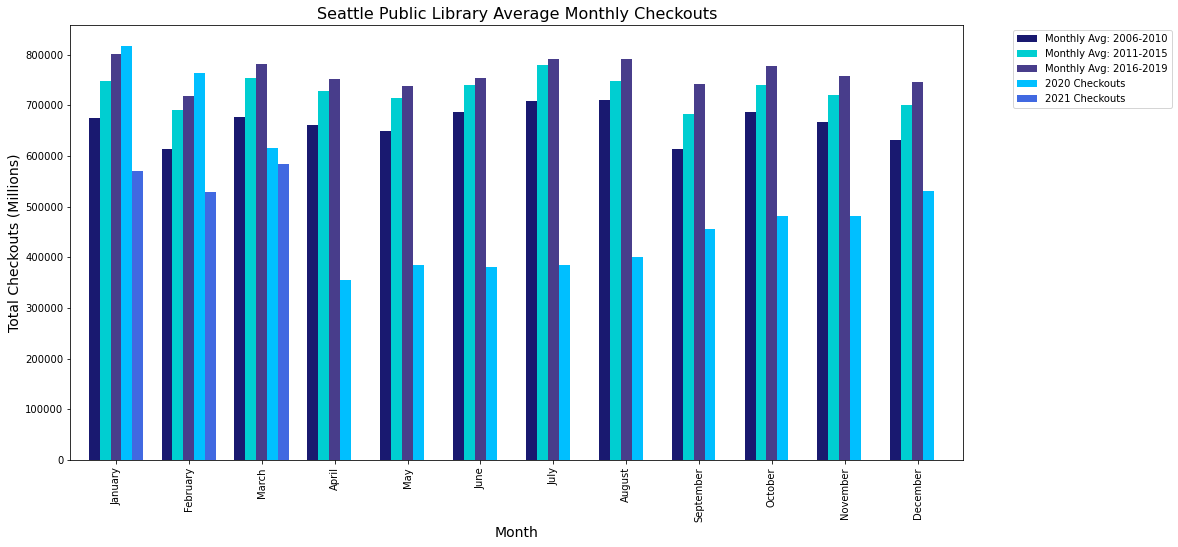

In [148]:
# The final dataframe of average monthly performance for each time period is visualized to show monthly trends and YoY change.

monthly_average_checkouts.plot(kind='bar', figsize=(16, 8), width= .75, color = ['midnightblue', 'darkturquoise', 'darkslateblue', 'deepskyblue', 'royalblue'])
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Month', size = 14)
plt.ylabel('Total Checkouts (Millions)', size = 14)
plt.title('Seattle Public Library Average Monthly Checkouts', size=16);

## Explore trends in digital and physical materials

As the exploration of yearly trends shows, there are clear indications of instances where certain material types rose and declined in popularity and this was an important portion of the analysis in understanding the library system's ability to cater to the community. This portion of the analysis relied on the dataset's provided material type value and in some cases groups by broaded types were created to allow for investigation into interesting trends.

The highest level of material type is the usage class, which indicates whether an item was physical or digital. A new dataset was created to show checkouts by usage class, illustrating the expected sharp rise in digital materials over the last decade. Ahead of the pandemic in 2019, digital materials made up 37% of the year's total checkouts. Digital material checkouts rose nearly 900K in 2020 (comprising 71% of the year's total checkouts), and are slated to continue their rise in 2021. While checkouts of physical materials is projected to be higher in 2021 than 2020, the projected EOY total of 2.2M for that usage class is still -62% below 2019.

In [62]:
# A dataframe of yearly performance by usage class is created and then pivoted to allow for comparison across digital and physical items with projections for 2021.

usage_class_by_year = spl_checkouts_full_years_2021.groupby(['checkout_year', 'usage_class'])['checkout_count'].sum().reset_index()
usage_class_by_year_pivot = usage_class_by_year.pivot(index='checkout_year', columns='usage_class', values='checkout_count').reset_index()

digital_projection_2021 = int((usage_class_by_year_pivot[usage_class_by_year_pivot['checkout_year'] == 2021]['Digital'] / 3) * 12)
physical_projection_2021 = int((usage_class_by_year_pivot[usage_class_by_year_pivot['checkout_year'] == 2021]['Physical'] / 3) * 12)

usage_class_2021_update_dig = usage_class_by_year_pivot.replace([usage_class_by_year_pivot[usage_class_by_year_pivot['checkout_year'] == 2021]['Digital']], digital_projection_2021)
usage_class_pivot_final = usage_class_2021_update_dig.replace([usage_class_2021_update_dig[usage_class_2021_update_dig['checkout_year'] == 2021]['Physical']], physical_projection_2021)

usage_class_pivot_final['% Digital'] = (usage_class_pivot_final['Digital'] / checkouts_by_year_final_df['checkout_count']) * 100
usage_class_pivot_final.rename(columns={
    'checkout_year': 'Checkout Year',
    'Digital': 'Digital Materials',
    'Physical': 'Physical Materials'
}, inplace=True)

usage_class_df = usage_class_pivot_final.set_index('Checkout Year')

usage_class_df

usage_class,Digital Materials,Physical Materials,% Digital
Checkout Year,,,
2006,16839,6582479,0.255163
2007,34620,7092007,0.485784
2008,63945,8374541,0.757778
2009,99329,9035838,1.087325
2010,183920,8425046,2.136377
2011,536937,7784795,6.452227
2012,863922,7299124,10.583329
2013,1192836,7864260,13.170182
2014,1719202,7416879,18.817718


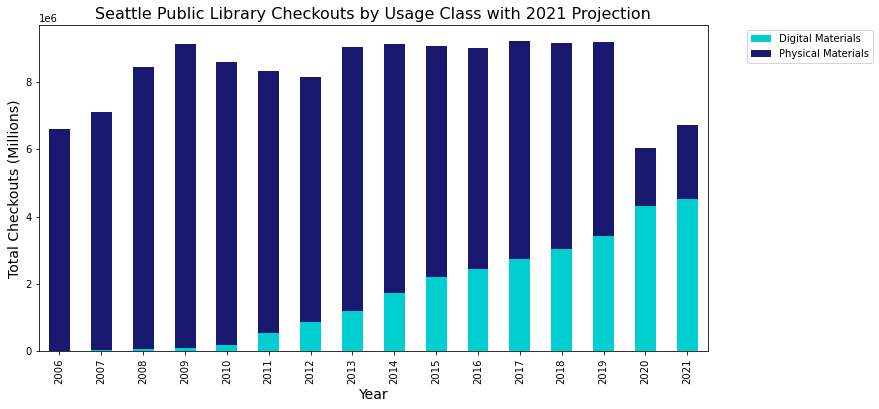

In [149]:
#The usage class dataframe created above is repurposed to visualize total checkouts by usage class.

usage_class_df[['Digital Materials', 'Physical Materials']].plot(kind='bar', stacked=True, figsize=(12, 6), color = ['darkturquoise', 'midnightblue'])
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Year', size = 14)
plt.ylabel('Total Checkouts (Millions)', size = 14)
plt.title('Seattle Public Library Checkouts by Usage Class with 2021 Projection', size=16);

## Explore trends in material utility

The Seattle Public Library's material type categorization is the next level of granularity from usage class. The SPL system provides its patrons with a wide variety of materials for loan, ranging from mobile hotspots to maps. One of the first steps in understanding trends in material type over time is to categorize materials into broad buckets, mitigating the impact of the many irregularities that exist within the Library's master catalogue. The buckets for analysis aligned with user intent, representing Literary material, Music and Sound material, Video material, and a catch-all Other for the additional materials. 

A visualization of this bucketing shows the meteoric rise in the popularity of literary materials, fueled by the increasingly wider adoption of digital and audio consumption. The strength of the Library's digital literary inventory was paramount to avoiding a sharper overall checkout decline during the pandemic. More importantly, this bucketing shows a troubling decline since 2009 in both Music & Sound and Video materials, which were previously important drivers of scale. 

Affordable streaming options that cater to all stripes of entertainment interests means that the Library will need to innovate in this space and think creatively about the utility it can provide for patrons in an increasingly-digital world. On the flip side of this, a cultural resurgence and appreciation for older entertainment technology such as records and cassette tapes means that the Library has potential to remarket an extensive portion of catalogue to potential new groups of patrons.

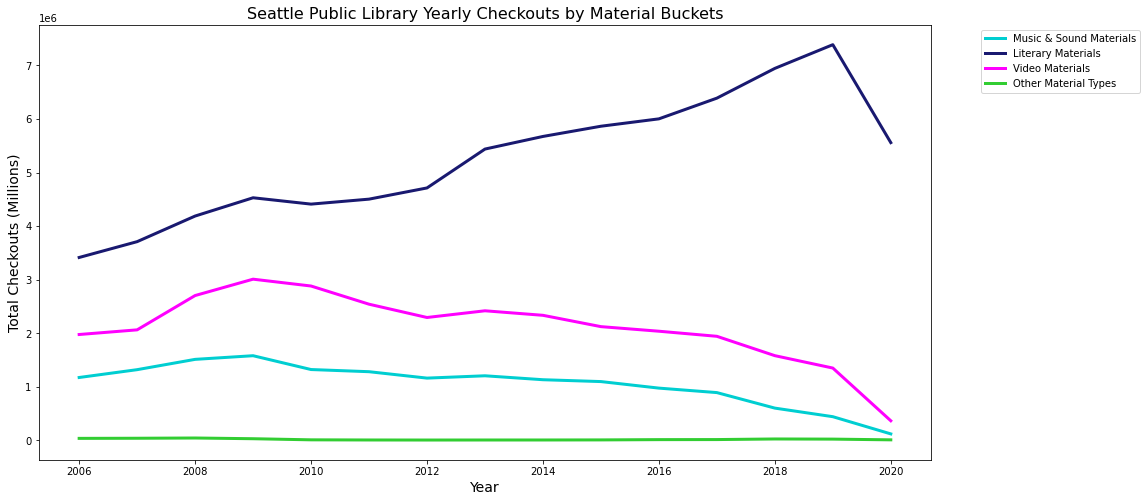

In [150]:
# This portion of the analysis relies on bucketing of material types. Confirmation of what should be included in the "Other" bucket was done by checking indiviual material categories by hand. This portion of the Python code runs very slowly and is a candidate for future improvement.

music_and_sound_material = spl_checkouts_full_years[(spl_checkouts_full_years['material_type'].str.contains('SOUND'))|(spl_checkouts_full_years['material_type'].str.contains('MUSIC'))|(spl_checkouts_full_years['material_type'].str.contains('SONG'))].groupby('checkout_year')['checkout_count'].sum()
literary_material = spl_checkouts_full_years[(spl_checkouts_full_years['material_type'].str.contains('BOOK'))|(spl_checkouts_full_years['material_type'].str.contains('MAGAZINE'))|(spl_checkouts_full_years['material_type'].str.contains('REGPRINT'))|(spl_checkouts_full_years['material_type'].isin(['COMIC', 'CR', 'KIT', 'ER', 'LARGEPRINT']))].groupby('checkout_year')['checkout_count'].sum()
video_material = spl_checkouts_full_years[(spl_checkouts_full_years['material_type'].str.contains('VIDEO'))|(spl_checkouts_full_years['material_type'].str.contains('MOVIE'))|(spl_checkouts_full_years['material_type'].str.contains('VISUAL'))|(spl_checkouts_full_years['material_type'].str.contains('TELEVISION'))].groupby('checkout_year')['checkout_count'].sum()
other_material = spl_checkouts_full_years[(~spl_checkouts_full_years['material_type'].str.contains('SOUND')) & (~spl_checkouts_full_years['material_type'].str.contains('MUSIC')) & (~spl_checkouts_full_years['material_type'].str.contains('SONG')) & (~spl_checkouts_full_years['material_type'].str.contains('BOOK')) & (~spl_checkouts_full_years['material_type'].str.contains('REGPRINT')) & (~spl_checkouts_full_years['material_type'].str.contains('VIDEO')) & (~spl_checkouts_full_years['material_type'].isin(['MOVIE', 'COMIC', 'CR', 'KIT', 'ER', 'LARGEPRINT', 'VISUAL', 'TELEVISION', 'MAGAZINE']))].groupby('checkout_year')['checkout_count'].sum()

plt.figure(figsize=(16, 8))
plt.plot(music_and_sound_material, color = 'darkturquoise', linewidth = 3)
plt.plot(literary_material, color = 'midnightblue', linewidth = 3)
plt.plot(video_material, color = 'magenta', linewidth = 3)
plt.plot(other_material, color = 'limegreen', linewidth = 3)
plt.legend(['Music & Sound Materials', 'Literary Materials', 'Video Materials', 'Other Material Types'], bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Year', size = 14)
plt.ylabel('Total Checkouts (Millions)', size = 14)
plt.title('Seattle Public Library Yearly Checkouts by Material Buckets', size=16);

## Explore changes in popular material types

As was shown in the analysis above, the introduction of new technology that advances the Library's breadth of material offerings is essential in growing the scale of checkouts year-over-year. One element of the analysis that adds an additional layer of depth in understanding changing audience tastes over the last fifteen years is an examination of popular material types from the beginning and end of the dataset. The impact of the COVID-19 pandemic is explored below, so this analysis focuses on 2006-2019.

During the first five complete years of data (2006-2010), the most popular individual material types for total checkouts were Books, Video Discs, Sound Discs, and Video Cassettes. For the five years prior to the pandemic (2015-2019), the most popular individual material types were Books, Video Discs, E-Books, Audio Books, and Sound Discs. When we visualize the yearly performance of these popular material types since 2006, we can see that, prior to the pandemic, the yearly checkouts of physical books has remained the stalwart buoy for the library system's scale. 

The dataset begins right before the effective end of patron interest in Video and Sound Cassettes, which were replaced momentarily by a surge in DVD and CD checkouts. Alternative literary options like e-books and audio books hit their stride after 2009, but the consolidation of checkouts in this space has left the library with a clear whitspace to fill with broader entertainment options.

In [83]:
# Identify the top five individual material types for 2006-2010. These will be plotted against the most popular for 2015-2019.

first_top_five_material_types = spl_checkouts_full_years[spl_checkouts_full_years['checkout_year'].isin(['2006', '2007', '2008', '2009', '2010'])].groupby('material_type')['checkout_count'].sum().sort_values(ascending = False).head(5)

first_top_five_material_types

material_type
BOOK         19759812
VIDEODISC    11404782
SOUNDDISC     6508145
VIDEOCASS     1081495
SOUNDCASS      238214
Name: checkout_count, dtype: int64

In [84]:
# Identify the top five individual material types for 2015-2019. These will be plotted against the most popular for 2006-2010.

last_top_five_material_types = spl_checkouts_full_years[spl_checkouts_full_years['checkout_year'].isin(['2015', '2016', '2017', '2018', '2019'])].groupby('material_type')['checkout_count'].sum().sort_values(ascending = False).head(5)

last_top_five_material_types

material_type
BOOK         19770819
VIDEODISC     8718329
EBOOK         8335725
AUDIOBOOK     4044957
SOUNDDISC     2997879
Name: checkout_count, dtype: int64

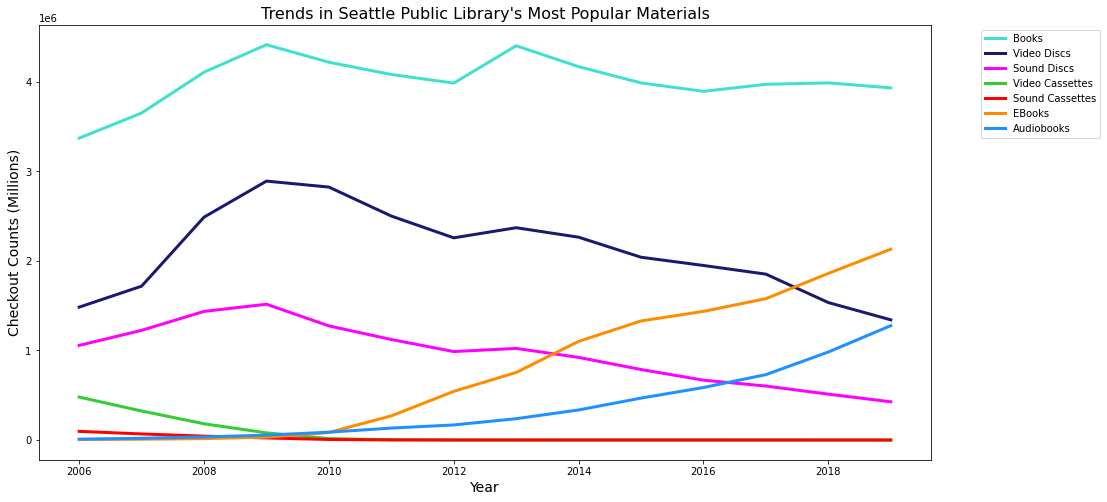

In [156]:
# The results of finding the top five material types for the beginning of the data set and pre-pandemic end of the dataset are visualized

book = spl_checkouts_full_years_no_covid[spl_checkouts_full_years_no_covid['material_type'] == 'BOOK'].groupby('checkout_year')['checkout_count'].sum()
videodisc = spl_checkouts_full_years_no_covid[spl_checkouts_full_years_no_covid['material_type'] == 'VIDEODISC'].groupby('checkout_year')['checkout_count'].sum()
sounddisc = spl_checkouts_full_years_no_covid[spl_checkouts_full_years_no_covid['material_type'] == 'SOUNDDISC'].groupby('checkout_year')['checkout_count'].sum()
videocassette = spl_checkouts_full_years_no_covid[spl_checkouts_full_years_no_covid['material_type'] == 'VIDEOCASS'].groupby('checkout_year')['checkout_count'].sum()
soundcassette = spl_checkouts_full_years_no_covid[spl_checkouts_full_years_no_covid['material_type'] == 'SOUNDCASS'].groupby('checkout_year')['checkout_count'].sum()
ebook = spl_checkouts_full_years_no_covid[spl_checkouts_full_years_no_covid['material_type'] == 'EBOOK'].groupby('checkout_year')['checkout_count'].sum()
audiobook = spl_checkouts_full_years_no_covid[spl_checkouts_full_years_no_covid['material_type'] == 'AUDIOBOOK'].groupby('checkout_year')['checkout_count'].sum()

plt.figure(figsize=(16, 8))
plt.plot(book, color = 'turquoise', linewidth = 3)
plt.plot(videodisc, color = 'midnightblue', linewidth = 3)
plt.plot(sounddisc, color = 'magenta', linewidth = 3)
plt.plot(videocassette, color = 'limegreen', linewidth = 3)
plt.plot(soundcassette, color = 'red', linewidth = 3)
plt.plot(ebook, color = 'darkorange', linewidth = 3)
plt.plot(audiobook, color = 'dodgerblue', linewidth = 3)
plt.legend(['Books', 'Video Discs', 'Sound Discs', 'Video Cassettes', 'Sound Cassettes', 'EBooks', 'Audiobooks'], bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Year', size = 14)
plt.ylabel('Checkout Counts (Millions)', size = 14)
plt.title('Trends in Seattle Public Library\'s Most Popular Materials', size=16);

## Analyze the impact of COVID-19 on material types

With a clear understanding of the trends in checkouts before COVID-19 hit the United States in March, it's time to see what impact the pandemic had on the types of materials patrons consumed. In order to perform this analysis, three dataframes are made for 2019-2021, and grouped by material type and aggregated checkouts. These three dataframs are then merged together and additional columns are created to allow views of 2021's projected checkouts by material type, the percentage of total checkouts each material type contributed, and year-over-year changes between 2019, 2020, and a projected 2021. 

One of the most notable trends is the surge in e-book checkouts, which grew nearly 700K in total checkouts from 2019 to 2020. Audiobooks also saw a rise in popularity during the pandemic, but not to the same extent as the equivalent options for digital readers. 

The audiobook and podcast space is another whitespace for the Library to explore as it emerges from the pandemic, especially as workers begin to commute again. It is essential that the Library's catalogue of audiobooks and how to access them be readily available for patrons of all ages.

In [108]:
# A separate dataframe is made for 2019, 2020, and 2021, along with mask variables for each year's total checkouts. These dataframes are merged 

checkouts_2019 = spl_checkouts_full_years_2021[spl_checkouts_full_years_2021['checkout_year'] == 2019].groupby('material_type')['checkout_count'].sum().sort_values(ascending = False).reset_index()
checkouts_2020 = spl_checkouts_full_years_2021[spl_checkouts_full_years_2021['checkout_year'] == 2020].groupby('material_type')['checkout_count'].sum().sort_values(ascending = False).reset_index()
checkouts_2021 = spl_checkouts_full_years_2021[spl_checkouts_full_years_2021['checkout_year'] == 2021].groupby('material_type')['checkout_count'].sum().sort_values(ascending = False).reset_index()
total_checkouts_2019 = int(checkouts_2019['checkout_count'].sum())
total_checkouts_2020 = int(checkouts_2020['checkout_count'].sum())
total_checkouts_2021 = int(checkouts_2021['checkout_count'].sum())

covid_impact_yoy_2019_2020 = pd.merge(checkouts_2019, checkouts_2020, on = 'material_type', how='outer').fillna(0)
covid_impact_yoy_final = pd.merge(covid_impact_yoy_2019_2020, checkouts_2021, on = 'material_type', how='outer').fillna(0)

covid_impact_yoy_final['Projected 2021 Checkout Count'] = ((covid_impact_yoy_final['checkout_count'] / 3) * 12).fillna(0).astype('int64')
covid_impact_yoy_final['2019 % of Total Checkouts'] = ((covid_impact_yoy_final['checkout_count_x'] / total_checkouts_2019) * 100).fillna(0).astype('int64')
covid_impact_yoy_final['2020 % of Total Checkouts'] = ((covid_impact_yoy_final['checkout_count_y'] / total_checkouts_2020) * 100).fillna(0).astype('int64')
covid_impact_yoy_final['2021 % of Total Checkouts'] = ((covid_impact_yoy_final['checkout_count'] / total_checkouts_2021) * 100).fillna(0).astype('int64')
covid_impact_yoy_final['2020 vs. 2019'] = (covid_impact_yoy_final['checkout_count_y'] - checkouts_2019['checkout_count']).fillna(0).astype('int64')
covid_impact_yoy_final['2021 vs. 2020'] = (covid_impact_yoy_final['Projected 2021 Checkout Count'] - checkouts_2020['checkout_count']).fillna(0).astype('int64')
covid_impact_yoy_final['2021 vs. 2019'] = (covid_impact_yoy_final['Projected 2021 Checkout Count'] - checkouts_2019['checkout_count']).fillna(0).astype('int64')

In [112]:
# The columns of the final year-over-year dataframe are renamed and the 2021 checkout count without projections is dropped to allow for a clean table visualizations.

covid_impact_yoy_final.rename(columns={
    'material_type': 'Material Type',
    'checkout_count_x': '2019 Checkouts',
    'checkout_count_y': '2020 Checkouts',
    'checkout_count': '2021 Checkouts'
}, inplace=True)

covid_impact_yoy_final.drop('2021 Checkouts', axis=1, inplace=True)

In [134]:
# The final dataframe is visualized as a table to allow for a complete understanding of the YoY impact on each material type.

covid_impact_table = covid_impact_yoy_final.sort_values('2020 vs. 2019', ascending = False)

covid_impact_table.set_index('Material Type')

,2019 Checkouts,2020 Checkouts,Projected 2021 Checkout Count,2019 % of Total Checkouts,2020 % of Total Checkouts,2021 % of Total Checkouts,2020 vs. 2019,2021 vs. 2020,2021 vs. 2019
Material Type,,,,,,,,,
EBOOK,2130439.0,2793961.0,2864012,23,46,42,663522,1350387,733573
AUDIOBOOK,1276883.0,1513625.0,1648580,13,25,24,236742,1286993,371697
VIDEO,2298.0,2430.0,1400,0,0,0,132,776,-898
PHOTO,0.0,1.0,0,0,0,0,0,0,0
"SOUNDDISC, VIDEOCASS",0.0,2.0,8,0,0,0,0,0,0
"ER, VIDEOREC",1.0,1.0,0,0,0,0,0,0,-1
FLASHCARD,1.0,1.0,0,0,0,0,0,0,-1
PICTURE,1.0,1.0,0,0,0,0,0,0,-1
"SOUNDCASS, SOUNDDISC, VIDEOCASS, VIDEODISC",1.0,1.0,0,0,0,0,0,-1,-1


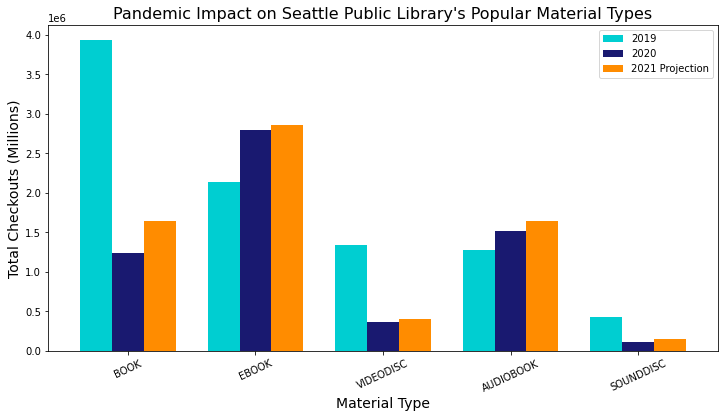

In [157]:
# A subset of the data from the COVID-19 impact table above is used to create a dataframe for visualization, focusing on the five material types that saw a decline or increase of 200K between 2019 and 2020.

covid_impact_plot = covid_impact_table[covid_impact_table['Material Type'].isin(['EBOOK', 'AUDIOBOOK', 'BOOK', 'VIDEODISC', 'SOUNDDISC'])][['Material Type', '2019 Checkouts', '2020 Checkouts', 'Projected 2021 Checkout Count']].set_index('Material Type').sort_values('2019 Checkouts', ascending = False)

covid_impact_plot.plot(kind='bar', figsize=(12, 6), color = ['darkturquoise', 'midnightblue', 'darkorange'], width = .75)
plt.xticks(rotation = 25)
plt.legend(['2019', '2020', '2021 Projection'])
plt.xlabel('Material Type', size = 14)
plt.ylabel('Total Checkouts (Millions)', size = 14)
plt.title('Pandemic Impact on Seattle Public Library\'s Popular Material Types', size=16);